In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
#import coremltools

import os
print(os.listdir("../input"))
data = pd.read_csv("../input/dataset for project - Sheet1.csv")
x =data[['Age','Family_History','Under_Medication','Academic_Performance','Behavioral_Problem',
         'Concentration','Restless','Seizures','Learning_Difficulty']].values
x = x.astype(float)
print(x)

print(data)

# Any results you write to the current directory are saved as output.

['dataset for project - Sheet1.csv']
[[3. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [3. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [3. 0. 1. ... 0. 0. 1.]]
     User_ID  Age   ...     Learning_Difficulty  Problem
0          1    3   ...                       0        0
1          2    2   ...                       1        1
2          3    0   ...                       1        1
3          4    3   ...                       0        1
4          5    3   ...                       1        1
5          6    1   ...                       0        0
6          7    2   ...                       1        0
7          8    3   ...                       0        0
8          9    0   ...                       0        0
9         10    1   ...                       0        0
10        11    1   ...                       0        1
11        12    3   ...                       0        1
12        13    2   ...                       1        1
13       

In [9]:
x.shape
y =data['Problem'].values
y.shape

(200,)

In [29]:
scale = MinMaxScaler()
scale.fit(x)
ad = scale.fit_transform(x)
np.set_printoptions(precision=2)
#data = pd.DataFrame(ad)
#print(ad)
n = data.shape[0]
n_train = int(np.round(n * .08))
limit = n_train+200
print(n_train)
disease_X_train = ad[:n_train,0:19] #
disease_X_test = ad[n_train:limit, 0:19]
#print(disease_X_train.shape)
#print(disease_X_test.shape)
disease_y_train = y[:n_train]
disease_y_test = y[n_train:limit]


logreg = LogisticRegression(solver='lbfgs')
logreg.fit(disease_X_train, disease_y_train)
disease_y_pred1 = logreg.predict(disease_X_test)
mse= mean_squared_error(disease_y_test, disease_y_pred1)
Testing_accuracy = np.sqrt(mse)
print('Testing_accuracy of Logistic Regression')
print(mse)
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(disease_X_train,disease_y_train)
y_pred1 = knn1.predict(disease_X_test)
print('knn accuracy')
mse = metrics.accuracy_score(disease_y_test, disease_y_pred1)
print(mse)
accu = np.sqrt(mse)
#print(accu)

from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
ms = np.sqrt(scores)
#print(ms)
knn = KNeighborsClassifier(n_neighbors = 5)
scores =cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
print("knn_cross_val")
rms = np.sqrt(scores)
print(scores)
scor1 = cross_val_score(logreg, x, y, cv=10, scoring='accuracy')
rm = np.sqrt(scor1)
print('logistic cross val')
print(scor1)
k_range = list(range(1, 31))
#param_grid = dict(n_neighbors=k_range)
#print(param_grid)
from sklearn.model_selection import GridSearchCV

16
Testing_accuracy of Logistic Regression
0.28804347826086957
knn accuracy
0.7119565217391305
knn_cross_val
[0.71 0.57 0.9  0.76 0.67 0.68 0.58 0.68 0.74 0.79]
logistic cross val
[0.62 0.81 0.95 0.86 0.71 0.74 0.68 0.84 0.84 0.74]


In [11]:
print(metrics.confusion_matrix(disease_y_test, disease_y_pred1))

[[56 12]
 [41 75]]


In [12]:
print('True:', disease_y_test[0:25])
print('Pred:', disease_y_pred1[0:25])

True: [0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1]
Pred: [0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1]


In [13]:
confusion = metrics.confusion_matrix(disease_y_test, disease_y_pred1)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [14]:
print("Classification Rate")
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(disease_y_test, disease_y_pred1))

Classification Rate
0.7119565217391305
0.7119565217391305


In [15]:
print("MisClassification Rate")
print(1 - metrics.accuracy_score(disease_y_test, disease_y_pred1))

MisClassification Rate
0.2880434782608695


In [30]:
logreg.predict_proba(disease_X_test)[0:10, :]
y_pred_prob = logreg.predict_proba(disease_X_test)[:, 1]

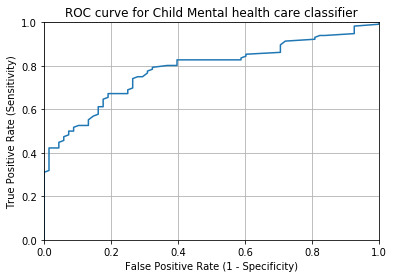

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(disease_y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Child Mental health care classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [18]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [19]:
evaluate_threshold(0.5)

Sensitivity: 0.646551724137931
Specificity: 0.8235294117647058


In [20]:
evaluate_threshold(0.4)

Sensitivity: 0.8017241379310345
Specificity: 0.6029411764705883


In [21]:
print(metrics.roc_auc_score(disease_y_test, y_pred_prob))

0.7862576064908722


In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, x, y, cv=10, scoring='roc_auc').mean()

x.tolist()
df = pd.DataFrame(x)
type(df)

pandas.core.frame.DataFrame

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = x.astype(float)
X = scaler.fit_transform(x)
dfx = pd.DataFrame(X)
print(dfx)

            0         1         2    ...            6         7         8
0    1.351274 -0.546536 -0.531085    ...    -0.531085 -0.546536 -0.546536
1    0.438251 -0.546536 -0.531085    ...    -0.531085 -0.546536  1.829707
2   -1.387795 -0.546536  1.882938    ...    -0.531085 -0.546536  1.829707
3    1.351274 -0.546536 -0.531085    ...     1.882938 -0.546536 -0.546536
4    1.351274 -0.546536 -0.531085    ...     1.882938 -0.546536  1.829707
5   -0.474772  1.829707 -0.531085    ...     1.882938 -0.546536 -0.546536
6    0.438251 -0.546536 -0.531085    ...    -0.531085 -0.546536  1.829707
7    1.351274 -0.546536 -0.531085    ...     1.882938 -0.546536 -0.546536
8   -1.387795 -0.546536 -0.531085    ...     1.882938 -0.546536 -0.546536
9   -0.474772 -0.546536 -0.531085    ...    -0.531085 -0.546536 -0.546536
10  -0.474772  1.829707 -0.531085    ...    -0.531085  1.829707 -0.546536
11   1.351274  1.829707 -0.531085    ...    -0.531085  1.829707 -0.546536
12   0.438251 -0.546536 -0.531085    .

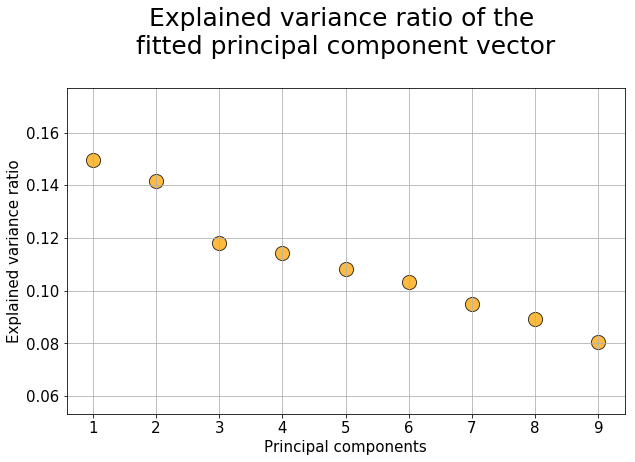

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [25]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8
0,-1.349897,-0.882207,-0.130882,2.450083,0.582921,1.489872,-0.432372,0.166780,-0.739144
1,0.244547,0.826652,-0.684963,0.773037,-0.823233,0.271948,-1.020340,0.079485,1.334202
2,-1.515145,1.476675,-1.308449,0.644766,1.682207,2.358783,1.094830,0.667279,1.308484
3,-0.897710,-0.231186,2.494392,1.440354,0.135113,2.215626,-0.105753,1.489814,-1.467666
4,2.382707,1.630146,1.950222,0.148024,-1.247321,1.646670,-0.393035,0.004611,-0.481049
5,1.371344,0.381105,3.169368,-0.863446,0.655724,-0.216305,0.863653,-0.920275,-0.571683
6,0.495796,2.074763,0.503438,0.437829,-0.274679,0.031973,-1.557226,1.038378,0.277927
7,0.208549,-0.951470,1.324296,1.971749,-0.277541,2.765389,1.333991,-0.891556,-1.256511
8,-1.173024,-0.205332,1.070765,-0.682698,-1.470031,-0.119566,1.312600,-0.084412,0.633396
9,-1.045497,0.016403,-0.374503,0.180353,-0.585848,-0.746115,-0.153076,-0.423985,0.064034


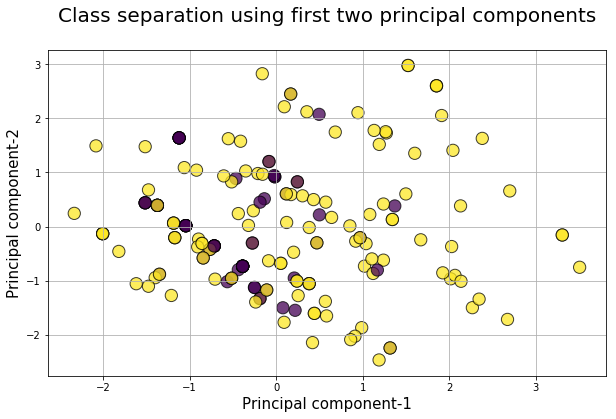

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=data['Problem'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()